# Feuture Importances

### Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Data Preprocessing

Step 1: Split X and y

In [2]:
def splits_X_y(df,columns):
    df=df[columns]
    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    return X, y

Step 2: Split Train Test

In [3]:
def split_Test_Train(df,columns):
    X, y = splits_X_y(df,columns)
    return train_test_split(X, y, test_size=0.25, random_state=42)

Step 3: Apply Standardization

In [4]:
def Scaller(Train,Test):
    StandardScaler = preprocessing.StandardScaler()
    Scalled_Train_data = StandardScaler.fit_transform(Train)
    Scalled_val_data = StandardScaler.transform(Test)
    return Scalled_Train_data,Scalled_val_data

Step 4: Apply PCA

In [5]:
def apply_PCA(data_train_scaled,data_test_scaled):
    pca = PCA(n_components = 4).fit(data_train_scaled)
    pca_data_train = pca.transform(data_train_scaled)
    pca_data_test = pca.transform(data_test_scaled)
    return pca_data_train,pca_data_test

Step 5: All Merge

In [6]:
def data_preprocess(df,columns):
    X_train,X_test,y_train,y_test =  split_Test_Train(df,columns)
    X_train,X_test = Scaller(X_train,X_test)       
    return X_train,X_test,y_train,y_test

### Calculate Metrics

Step 1: Calculate Metrics

In [7]:
def calculate_metrics(X_train,X_test,y_train,y_test,pca,method):
    if method == 'RandomForest':
        print ('Method: RandomForestClassifier')
        model = RandomForestClassifier()
    elif method == 'XGBoost':
        print ('Method: GradientBoostingClassifier')
        model = GradientBoostingClassifier()
    
    if pca:
        print ('Apply PCA: True')
        X_train,X_test=apply_PCA(X_train,X_test)
        model.fit(X_train, y_train)
        y_predicted = model.predict(X_test)
    else:
        print ('Apply PCA: False')
        model.fit(X_train, y_train)
        y_predicted = model.predict(X_test)
        
    print ('accuracy_score =', metrics.accuracy_score(y_test, y_predicted))
    print ('recall_score =', metrics.recall_score(y_test, y_predicted))
    print ('precision_score =', metrics.precision_score(y_test, y_predicted))
    print ('f1_score =', metrics.f1_score(y_test, y_predicted),'\n')
    return model,X_test,y_test

Step 2: Plot AUC

In [8]:
def plot_auc(model,X_test,y_test,title,method):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.title('AUC of {} Classifier with {}'.format(method,title))
    plt.legend(loc=4)
    plt.show()

### Feature Importances

Calculate feature importances with Random Forest and Gradient Boosting Classifier  and return the top 4 feature names.

In [9]:
def feuture_imortances(X_train,X_test,y_train,y_test,columns,method):
    
    if method == 'RandomForest':
        model = RandomForestClassifier()
    elif method == 'XGBoost':
        model = GradientBoostingClassifier()
    
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    
    print ('\nFeature Importance Description:')
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
        
    sorted_index = [i[0] for i in sorted(enumerate(importance), key=lambda x:x[1],reverse=True)]
    top4_features = sorted_index[0:4]
    column_top4 = [columns[i] for i in top4_features]
    sorted_features = [columns[i] for i in sorted_index]
    print('\nSorted feutures according to importance:')
    print(sorted_features)
    return column_top4

### Inputs

In [10]:
columns = ['Mean_integrated_profile','Standard_deviation_integrated','Excess_kurtosis_integrated',
           'Skewness_integrated','Mean_DM_SNR','Standard_DM_SNR','Excess_kurtosis_DM_SNR',
           'Skewness_DM_SNR','Target']

HTRU_2 = pd.read_csv('HTRU_2.csv', names = columns,sep=',')

## All Mergred

### Feature Importance Method 1: Random Forest

Method: RandomForestClassifier
Apply PCA: False
accuracy_score = 0.9794413407821229
recall_score = 0.8296296296296296
precision_score = 0.935933147632312
f1_score = 0.8795811518324608 



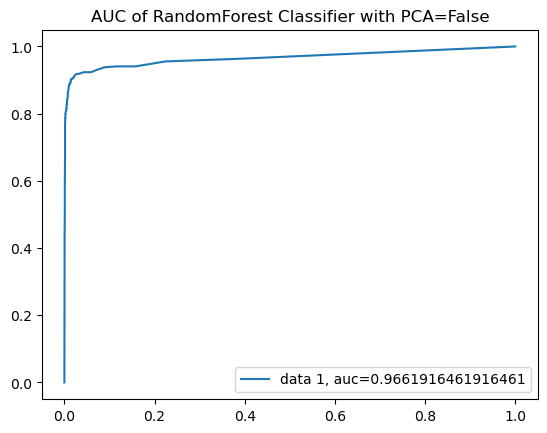

Method: RandomForestClassifier
Apply PCA: True
accuracy_score = 0.9781005586592179
recall_score = 0.8148148148148148
precision_score = 0.9348441926345609
f1_score = 0.8707124010554089 



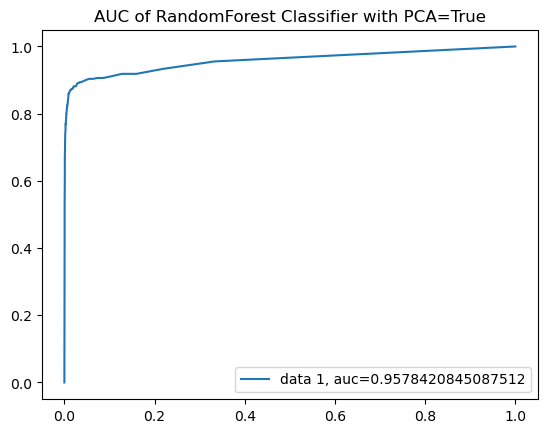


Feature Importance Description:
Feature: 0, Score: 0.21971
Feature: 1, Score: 0.04533
Feature: 2, Score: 0.30459
Feature: 3, Score: 0.21254
Feature: 4, Score: 0.07337
Feature: 5, Score: 0.06497
Feature: 6, Score: 0.03636
Feature: 7, Score: 0.04314

Sorted feutures according to importance:
['Excess_kurtosis_integrated', 'Mean_integrated_profile', 'Skewness_integrated', 'Mean_DM_SNR', 'Standard_DM_SNR', 'Standard_deviation_integrated', 'Skewness_DM_SNR', 'Excess_kurtosis_DM_SNR']

Model evaluation using top 4 important features:
Method: RandomForestClassifier
Apply PCA: False
accuracy_score = 0.9796648044692737
recall_score = 0.8296296296296296
precision_score = 0.9385474860335196
f1_score = 0.8807339449541284 



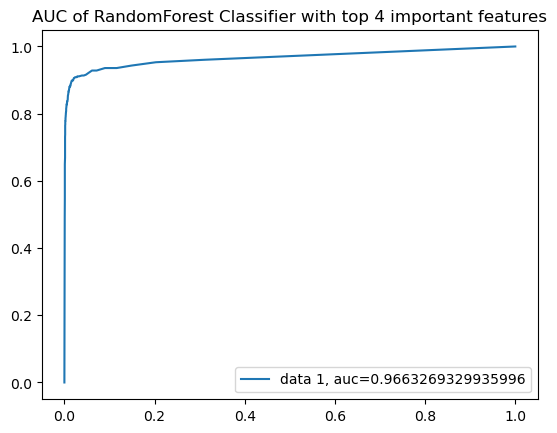

In [11]:
method1 = 'RandomForest'

X_train,X_test,y_train,y_test=data_preprocess(HTRU_2,columns)
model,X_test,y_test = calculate_metrics(X_train,X_test,y_train,y_test,False,method1)
plot_auc(model,X_test,y_test,'PCA=False',method1)

X_train,X_test,y_train,y_test=data_preprocess(HTRU_2,columns)
model,X_test,y_test = calculate_metrics(X_train,X_test,y_train,y_test,True,method1)
plot_auc(model,X_test,y_test,'PCA=True',method1)

X_train,X_test,y_train,y_test=data_preprocess(HTRU_2,columns)
new_columns=feuture_imortances(X_train,X_test,y_train,y_test,columns,method1)
new_columns.append('Target')

print('\nModel evaluation using top 4 important features:')
X_train,X_test,y_train,y_test=data_preprocess(HTRU_2,new_columns)
model,X_test,y_test = calculate_metrics(X_train,X_test,y_train,y_test,False,method1)
plot_auc(model,X_test,y_test,'top 4 important features',method1)

### Feature Importance Method 2: XGBOOST

Method: GradientBoostingClassifier
Apply PCA: False
accuracy_score = 0.9774301675977654
recall_score = 0.8395061728395061
precision_score = 0.9042553191489362
f1_score = 0.8706786171574904 



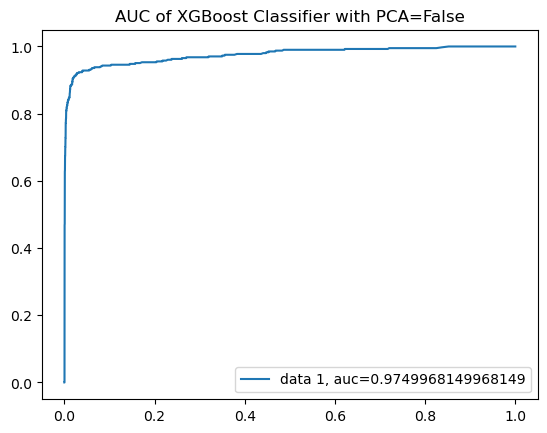

Method: GradientBoostingClassifier
Apply PCA: True
accuracy_score = 0.9767597765363129
recall_score = 0.8074074074074075
precision_score = 0.9263456090651558
f1_score = 0.8627968337730871 



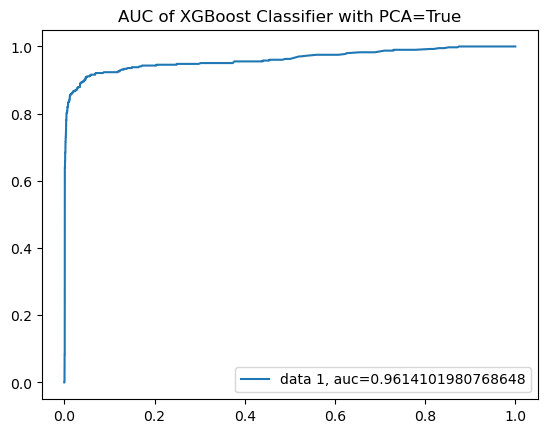


Feature Importance Description:
Feature: 0, Score: 0.01108
Feature: 1, Score: 0.01154
Feature: 2, Score: 0.92590
Feature: 3, Score: 0.00804
Feature: 4, Score: 0.00508
Feature: 5, Score: 0.02784
Feature: 6, Score: 0.00518
Feature: 7, Score: 0.00533

Sorted feutures according to importance:
['Excess_kurtosis_integrated', 'Standard_DM_SNR', 'Standard_deviation_integrated', 'Mean_integrated_profile', 'Skewness_integrated', 'Skewness_DM_SNR', 'Excess_kurtosis_DM_SNR', 'Mean_DM_SNR']

Model evaluation using top 4 important features:
Method: GradientBoostingClassifier
Apply PCA: False
accuracy_score = 0.9789944134078212
recall_score = 0.8444444444444444
precision_score = 0.9168900804289544
f1_score = 0.8791773778920309 



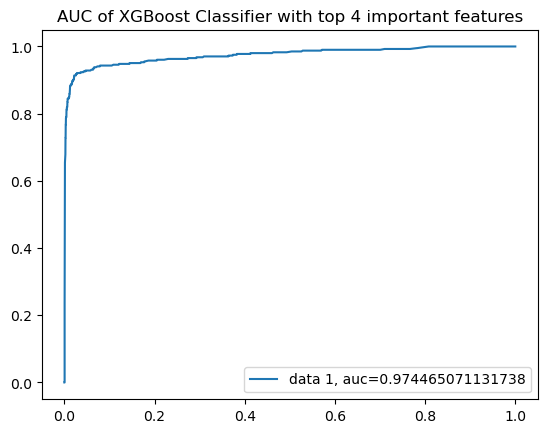

In [12]:
method2 = 'XGBoost'

X_train,X_test,y_train,y_test=data_preprocess(HTRU_2,columns)
model,X_test,y_test = calculate_metrics(X_train,X_test,y_train,y_test,False,method2)
plot_auc(model,X_test,y_test,'PCA=False',method2)

X_train,X_test,y_train,y_test=data_preprocess(HTRU_2,columns)
model,X_test,y_test = calculate_metrics(X_train,X_test,y_train,y_test,True,method2)
plot_auc(model,X_test,y_test,'PCA=True',method2)

X_train,X_test,y_train,y_test=data_preprocess(HTRU_2,columns)
new_columns=feuture_imortances(X_train,X_test,y_train,y_test,columns,method2)
new_columns.append('Target')

print('\nModel evaluation using top 4 important features:')
X_train,X_test,y_train,y_test=data_preprocess(HTRU_2,new_columns)
model,X_test,y_test = calculate_metrics(X_train,X_test,y_train,y_test,False,method2)
plot_auc(model,X_test,y_test,'top 4 important features',method2)